In [1]:
from pathways.scenarios import run_scenarios, load_scenario_table
from pathways.simulation import load_configuration
from pathways.outputs import save_scenario_result_to_pandas

In [2]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
from pathlib import Path
datadir = Path("tests/test_summaries")
basic_config = load_configuration(datadir / "config.yml")
scenario_table = load_scenario_table(datadir / "scenarios_config.csv")
results = run_scenarios(
    config=basic_config,
    scenario_table=scenario_table,
    seed=42,
    num_simulations=2,
    num_shipments=10,
)

large_1
large_2
large_3
large_4
large_5
large_6
large_7
large_8
large_9
large_10
large_11
large_12
large_13
large_14
large_15
large_16
large_17
large_18
large_19
large_20
large_21
large_22
large_23
large_24
large_25
large_26
large_27
large_28
large_29
large_30
large_31
large_32
large_33
large_34
large_35
large_36
large_37
large_38
large_39
large_40
large_41
large_42
large_43
large_44
large_45
large_46
large_47
large_48
small_1
small_2
small_3
small_4
small_5
small_6
small_7
small_8
small_9
small_10
small_11
small_12
small_13
small_14
small_15
small_16
small_17
small_18
small_19
small_20
small_21
small_22
small_23
small_24
small_25
small_26
small_27
small_28
small_29
small_30
small_31
small_32
small_33
small_34
small_35
small_36
small_37
small_38
small_39
small_40
small_41
small_42
small_43
small_44
small_45
small_46
small_47
small_48
maritime_1
maritime_2
maritime_3
maritime_4
maritime_5
maritime_6
maritime_7
maritime_8
maritime_9
maritime_10
maritime_11
maritime_12
maritime_13
maritim

In [4]:
df = save_scenario_result_to_pandas(
    results,
    config_columns=[
        "name",
        "shipment/boxes/min",
        "shipment/boxes/max",
        "shipment/stems_per_box/default",
        "pest/infestation_rate/parameters",
        "pest/arrangement",
        "inspection/unit",
        "inspection/sample_strategy",
        "inspection/percentage/proportion",
        "inspection/hypergeometric/detection_level",
        "inspection/selection_strategy",
        "inspection/within_box_pct",
        "inspection/hierarchical/outer",
    ],
    result_columns=[
        "missing",
        "true_infestation_rate",
        "max_missed_infestation_rate",
        "avg_missed_infestation_rate",
        "max_intercepted_infestation_rate",
        "avg_intercepted_infestation_rate",
        "avg_boxes_opened_completion",
        "avg_boxes_opened_detection",
        "avg_stems_inspected_completion",
        "avg_stems_inspected_detection",
        "pct_sample_if_to_detection",
        "pct_pest_unreported_if_detection",
    ],
)

In [5]:
df = pd.read_csv("H:/Shared drives/APHIS  Projects/Pathways/Results/results_all.csv")
df

name  shipment/boxes/min  shipment/boxes/max  \
0               large_1                  25                 500   
1               large_2                  25                 500   
2               large_3                  25                 500   
3               large_4                  25                 500   
4               large_5                  25                 500   
..                  ...                 ...                 ...   
427  clustered_small_44                   1                   3   
428  clustered_small_45                   1                   3   
429  clustered_small_46                   1                   3   
430  clustered_small_47                   1                   3   
431  clustered_small_48                   1                   3   

     stems_per_box/default pest/infestation_rate/parameters pest/arrangement  \
0                      200                          [1, 80]           random   
1                      200                          [1, 80]           random   
2                      200                          [1, 80]           random   
3                      200                          [1, 80]           random   
4                      200                          [1, 80]           random   
..                     ...                              ...              ...   
427                    200                          [1, 80]        clustered   
428                    200                          [1, 80]        clustered   
429                    200                          [1, 80]        clustered   
430                    200                          [1, 80]        clustered   
431                    200                          [1, 80]        clustered   

    inspection/unit inspection/sample_strategy  \
0               box                 percentage   
1               box                 percentage   
2               box                 percentage   
3               box                 percentage   
4               box                 percentage   
..              ...                        ...   
427            stem             hypergeometric   
428            stem             hypergeometric   
429            stem             hypergeometric   
430            stem             hypergeometric   
431            stem             hypergeometric   

     inspection/percentage/proportion  \
0                                0.02   
1                                0.02   
2                                0.05   
3                                0.05   
4                                0.10   
..                                ...   
427                               NaN   
428                               NaN   
429                               NaN   
430                               NaN   
431                               NaN   

     inspection/hypergeometric/detection_level  ...  \
0                                          NaN  ...   
1                                          NaN  ...   
2                                          NaN  ...   
3                                          NaN  ...   
4                                          NaN  ...   
..                                         ...  ...   
427                                       0.10  ...   
428                                       0.25  ...   
429                                       0.25  ...   
430                                       0.25  ...   
431                                       0.25  ...   

    max_missed_infestation_rate  avg_missed_infestation_rate  \
0                      0.019246                     0.001631   
1                      0.018504                     0.001613   
2                      0.008996                     0.000854   
3                      0.008994                     0.000871   
4                      0.005024                     0.000524   
..                          ...                          ...   
427                    0.088083                   

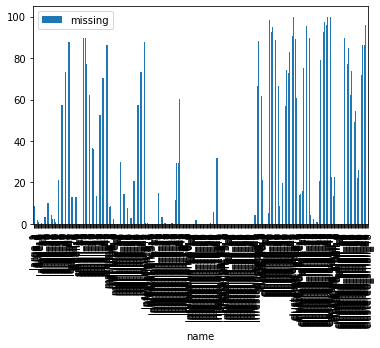

In [6]:
df.plot(kind="bar", x="name", y="missing")

In [7]:
df["shipment"] = df.apply(lambda row: re.sub("_[0-9]+$", "", row["name"]), axis = 1)

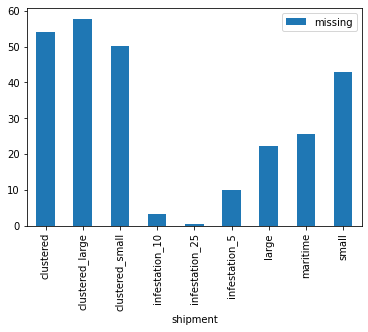

In [8]:
df.groupby("shipment").agg({"missing": "mean"}).reset_index().plot(kind="bar", x="shipment", y="missing")

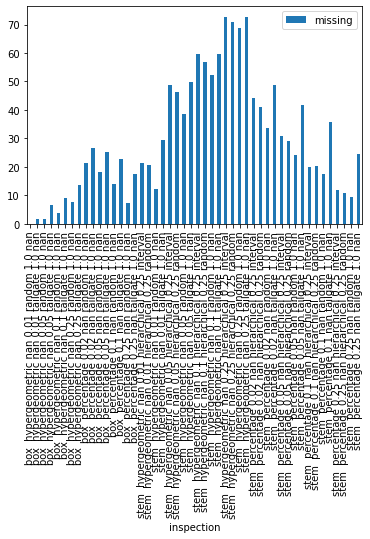

In [9]:
df["inspection"] = df.apply(lambda row: f"{row['inspection/unit']}  {row['inspection/sample_strategy']} {row['inspection/percentage/proportion']} {row['inspection/hypergeometric/detection_level']} {row['inspection/selection_strategy']} {row['inspection/within_box_pct']} {row['inspection/hierarchical/outer']}", axis = 1)

df.groupby("inspection").agg({"missing": "mean"}).reset_index().plot(kind="bar", x="inspection", y="missing")

In [10]:
inspections_vs_shipments = df.pivot_table(index=["inspection"], columns=["shipment"], values=["missing"])
inspections_vs_shipments

hypergeometric nan 0.25 hierarchical 0.25...  90.565554       96.558850   
stem  hypergeometric nan 0.25 random 1.0 nan        87.584984       87.990810   
stem  hypergeometric nan 0.25 tailgate 1.0 nan      99.873851       99.965911   
stem  percentage 0.02 nan hierarchical 0.25 int...  92.723982       61.775948   
stem  percentage 0.02 nan hierarchical 0.25 random  75.392760       53.795988   
stem  percentage 0.02 nan random 1.0 nan            57.839798        9.853680   
stem  percentage 0.02 nan tailgate 1.0 nan          98.631017       95.692811   
stem  percentage 0.05 nan hierarchical 0.25 int...  59.361172       27.099134   
stem  percentage 0.05 nan hierarchical 0.25 random  51.584877       25.989447   
stem  percentage 0.05 nan random 1.0 nan            35.945167        4.264714   
stem  percentage 0.05 nan tailgate 1.0 nan          95.274670       89.518811   
stem  percentage 0.1 nan hierarchical 0.25 inte...  24.348283        2.472409   
stem  percentage 0.1 nan hierarchical 0.25 random   28.070928        8.371813   
stem  percentage 0.1 nan random 1.0 nan             21.541454        2.175866   
stem  percentage 0.1 nan tailgate 1.0 nan           88.573258       80.376185   
stem  percentage 0.25 nan hierarchical 0.25 int...  10.224584        0.823141   
stem  percentage 0.25 nan hierarchical 0.25 random   8.784295        0.759060   
stem  percentage 0.25 nan random 1.0 nan             8.589203        0.768849   
stem  percentage 0.25 nan tailgate 1.0 nan          66.736859       58.325029   

                                                                    \
shipment                                           clustered_small   
inspection                                                           
box  hypergeometric nan 0.01 random 1.0 nan               0.000000   
box  hypergeometric nan 0.01 tailgate 1.0 nan             0.000000   
box  hypergeometric nan 0.05 random 1.0 nan               0.000000   
box  hypergeometric nan 0.05 tailgate 1.0 nan             0.000000   
box  hypergeometric nan 0.1 random 1.0 nan                0.000000   
box  hypergeometric nan 0.1 tailgate 1.0 nan              0.000000   
box  hypergeometric nan 0.25 random 1.0 nan               0.000000   
box  hypergeometric nan 0.25 tailgate 1.0 nan             0.000000   
box  percentage 0.02 nan random 1.0 nan                  13.375902   
box  percentage 0.02 nan tailgate 1.0 nan                22.543684   
box  percentage 0.05 nan random 1.0 nan                  13.375902   
box  percentage 0.05 nan tailgate 1.0 nan                22.543684   
box  percentage 0.1 nan random 1.0 nan                   13.375902   
box  percentage 0.1 nan tailgate 1.0 nan                 22.543684   
box  percentage 0.25 nan random 1.0 nan                  13.375902   
box  percentage 0.25 nan tailgate 1.0 nan                22.543684   
stem  hypergeometric nan 0.01 hierarchical 0.25...       25.995797   
stem  hypergeometric nan 0.01 hierarchical 0.25...       22.337872   
stem  hypergeometric nan 0.01 random 1.0 nan             13.319703   
stem  hypergeometric nan 0.01 tailgate 1.0 nan           26.415574   
stem  hypergeometric nan 0.05 hierarchical 0.25...       71.895848   
stem  hypergeometric nan 0.05 hierarchical 0.25...       69.207172   
stem  hypergeometric nan 0.05 random 1.0 nan             52.696712   
stem  hypergeometric nan 0.05 tailgate 1.0 nan           71.895848   
stem  hypergeometric nan 0.1 hierarchical 0.25 ...       86.551468   
stem  hypergeometric nan 0.1 hierarchical 0.25 ...       80.466489   
stem  hypergeometric nan 0.1 random 1.0 nan              70.545657   
stem  hypergeometric nan 0.1 tailgate 1.0 nan            86.551468   
stem  hypergeometric nan 0.25 hierarchical 0.25...       96.153567   
stem  hypergeometric nan 0.25 hierarchical 0.25...       92.324305   
stem  hypergeometric nan 0.25 random 1.0 nan             86.383880   
stem  hypergeometric nan 0.25 tailgate 1.0 nan           96.153567   
stem  percentage

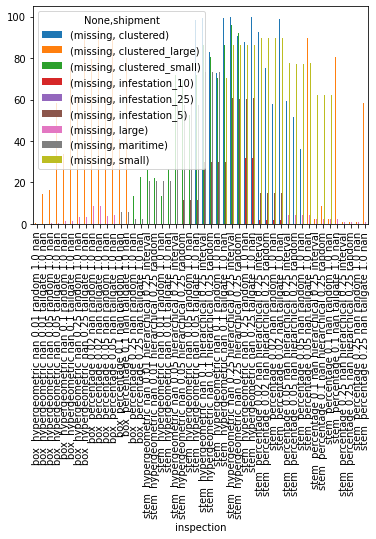

In [11]:
inspections_vs_shipments.plot(kind="bar")

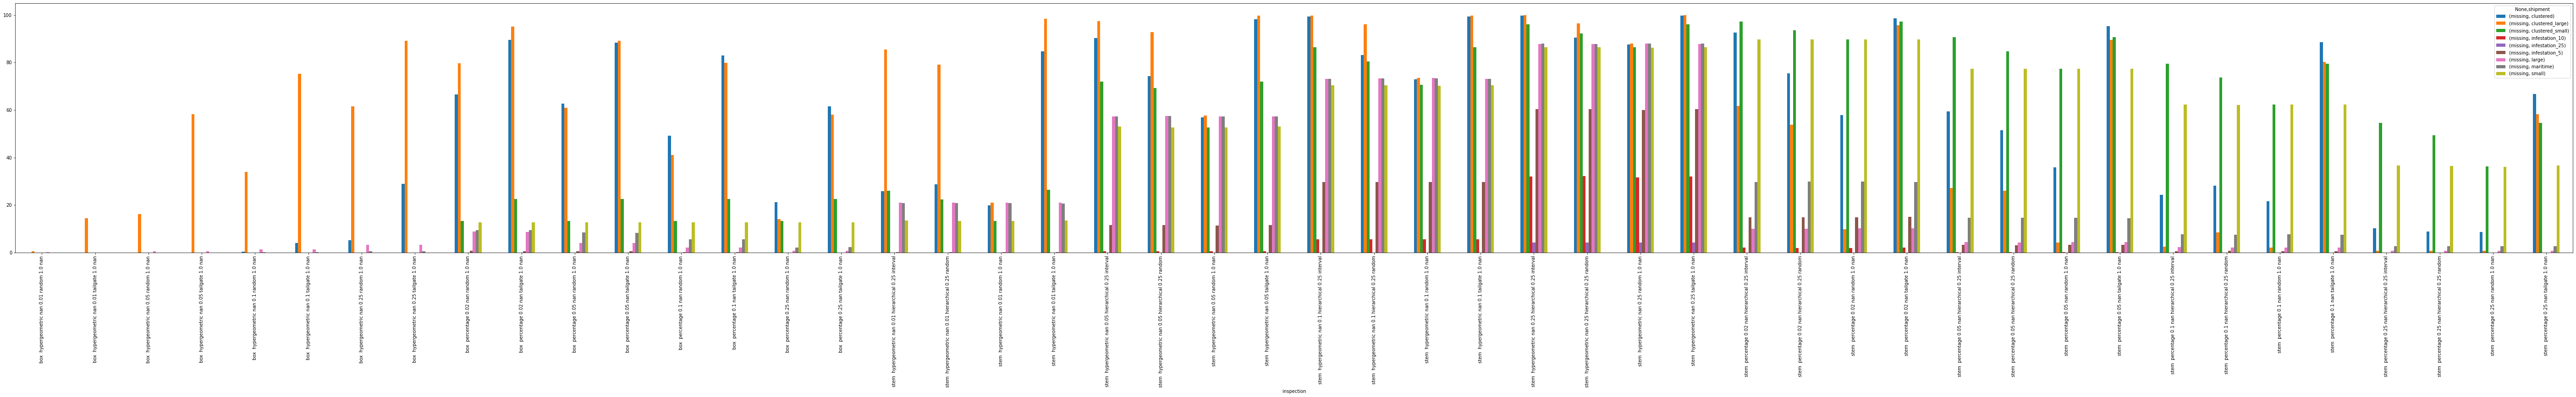

In [12]:
ax = inspections_vs_shipments.plot(kind="bar", figsize=(100, 10))
ax.figure.savefig("inspections_vs_shipments_bar.png")

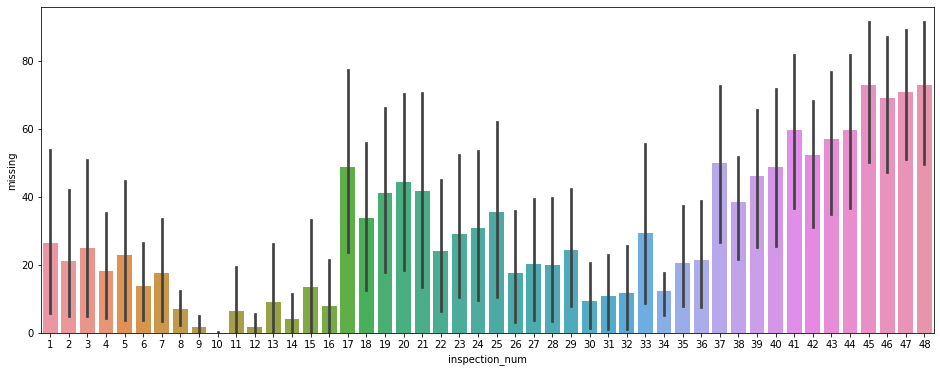

In [13]:
from itertools import cycle, islice

it = cycle(list(range(1,49)))
df['inspection_num'] = list(islice(it, len(df)))

plt.figure(figsize=(16, 6))
sns.barplot(x="inspection_num", y="missing", data=df, )

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

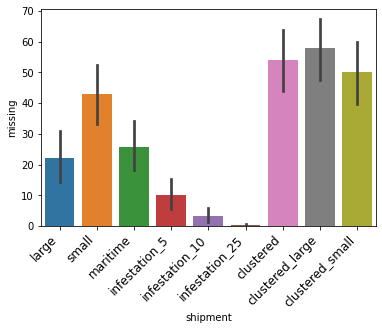

In [14]:
sns.barplot(x="shipment", y="missing", data=df)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)

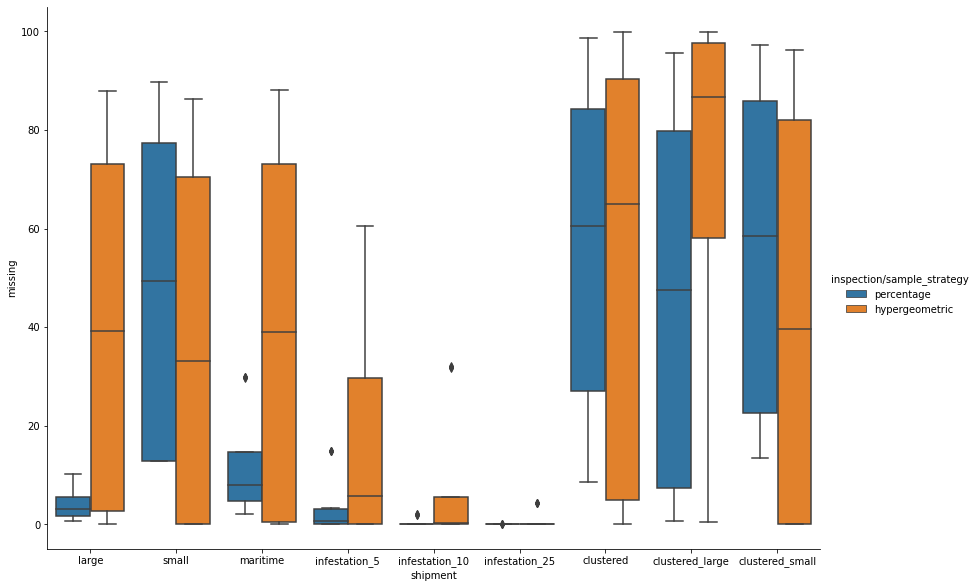

In [15]:
sns.catplot(x="shipment", y="missing", hue="inspection/sample_strategy", kind="box", data=df, height=8.27, aspect=11.7/8.27);

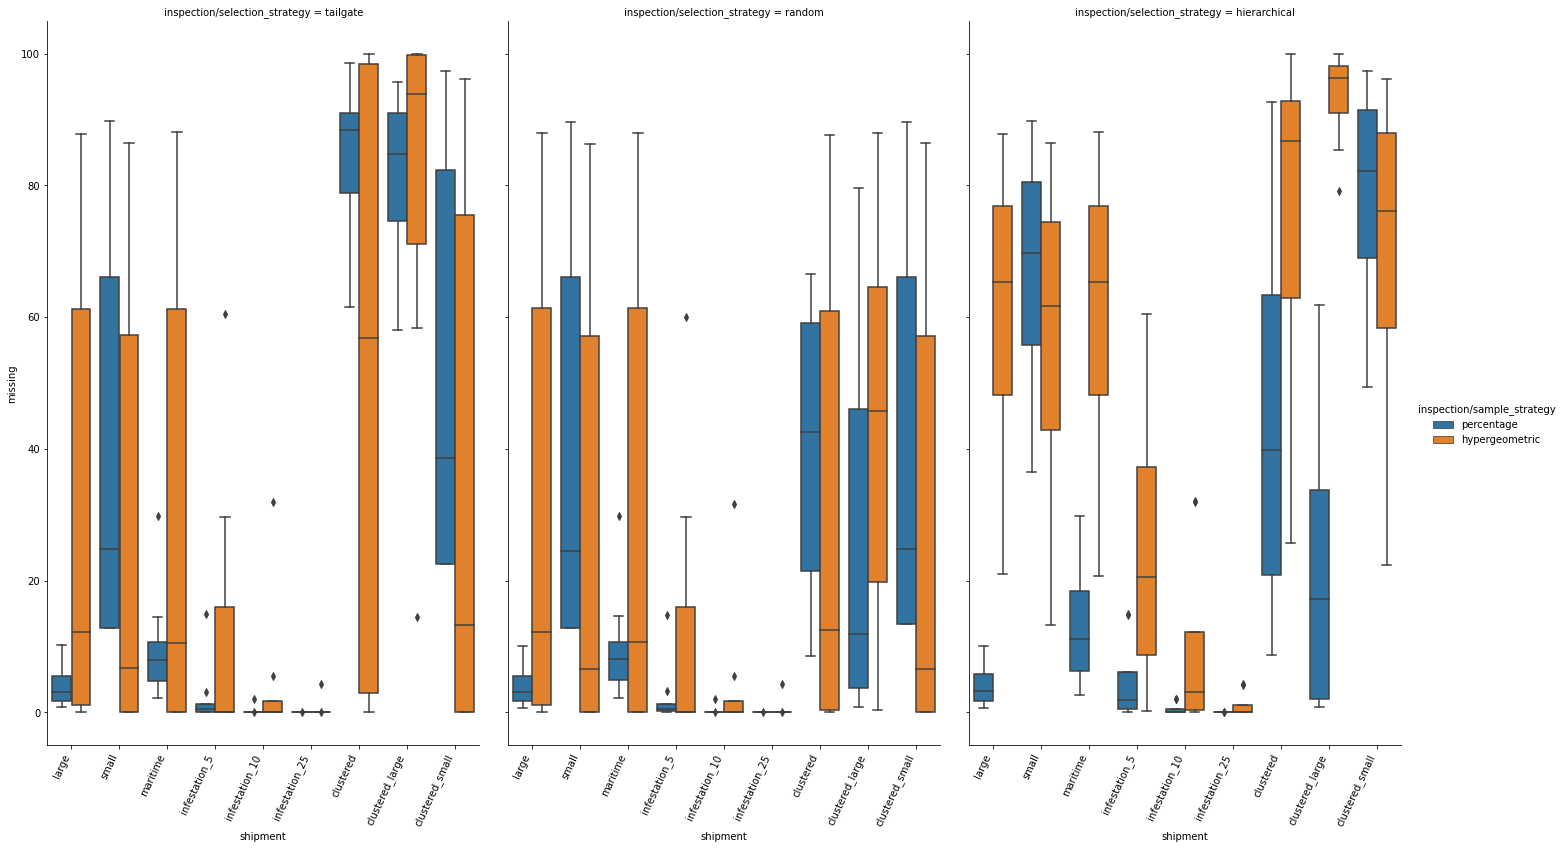

In [16]:
chart = sns.catplot(x="shipment", y="missing", hue="inspection/sample_strategy",
            col="inspection/selection_strategy", aspect=.6,
            kind="box", data=df, height=11)
chart.set_xticklabels(rotation=65, horizontalalignment='right')

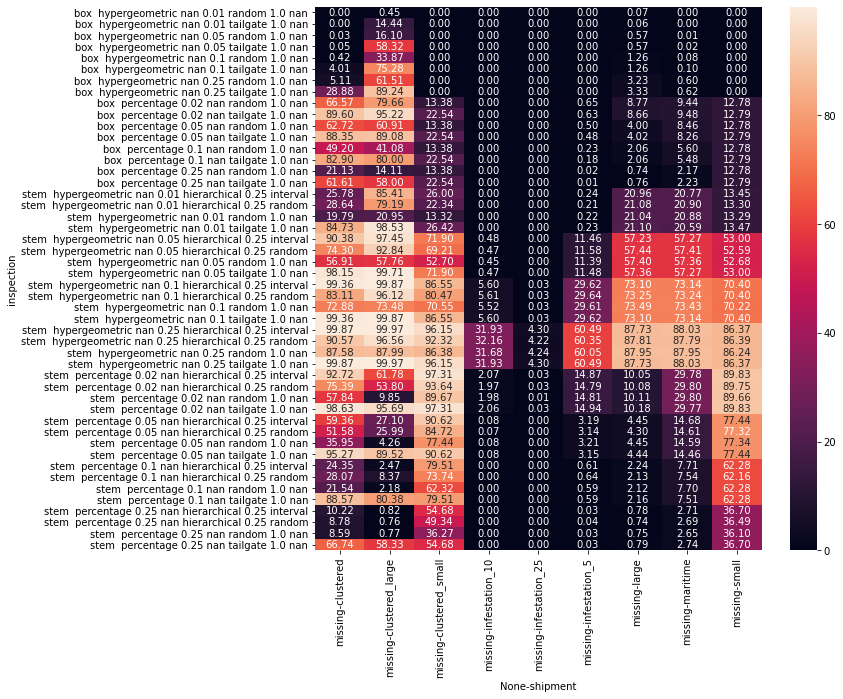

In [17]:
plt.figure(figsize=(10, 10))
sns.heatmap(data=inspections_vs_shipments, annot=True, fmt=".2f")

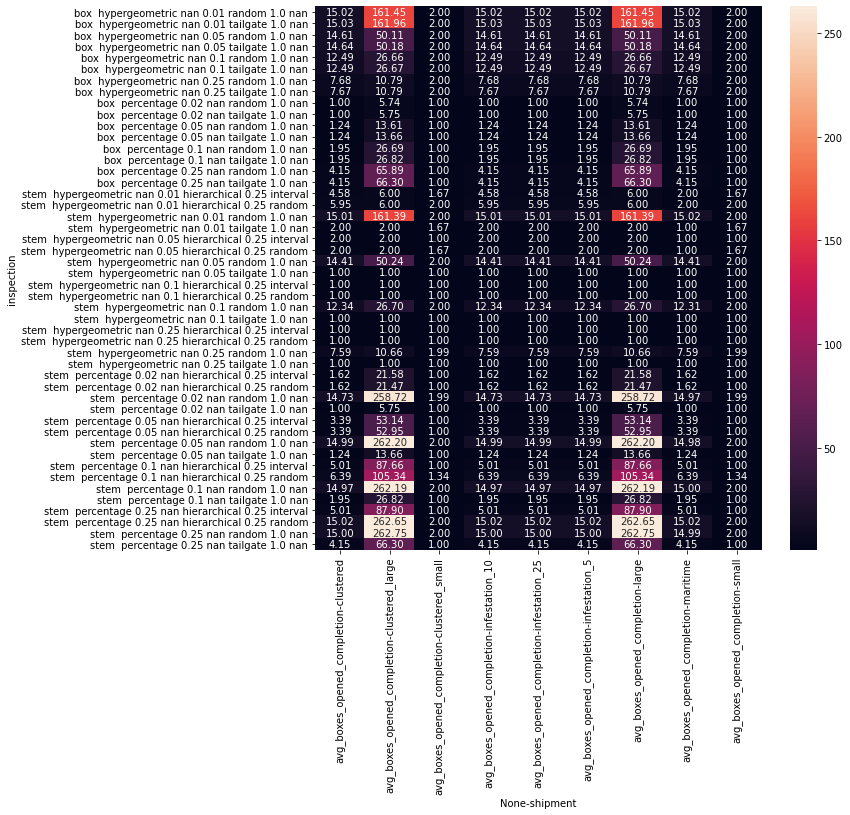

In [18]:
inspections_vs_shipments_boxes_opened = df.pivot_table(index=["inspection"], columns=["shipment"], values=["avg_boxes_opened_completion"])

plt.figure(figsize=(10, 10))
sns.heatmap(data=inspections_vs_shipments_boxes_opened, annot=True, fmt=".2f")

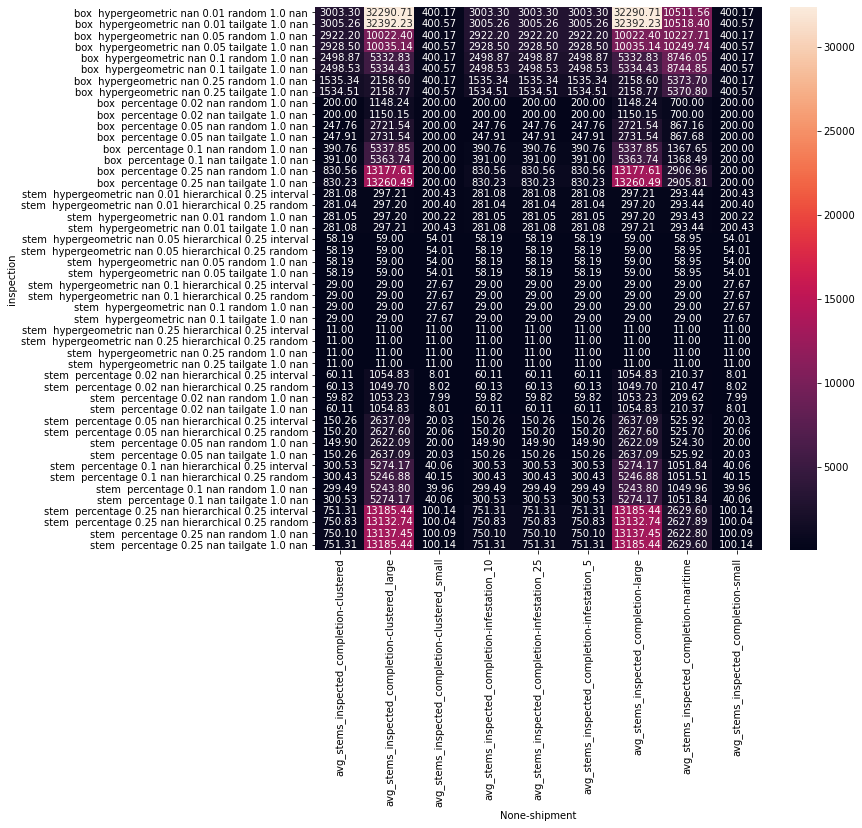

In [19]:
inspections_vs_shipments_stems_inspected = df.pivot_table(index=["inspection"], columns=["shipment"], values=["avg_stems_inspected_completion"])

plt.figure(figsize=(10, 10))
sns.heatmap(data=inspections_vs_shipments_stems_inspected, annot=True, fmt=".2f")

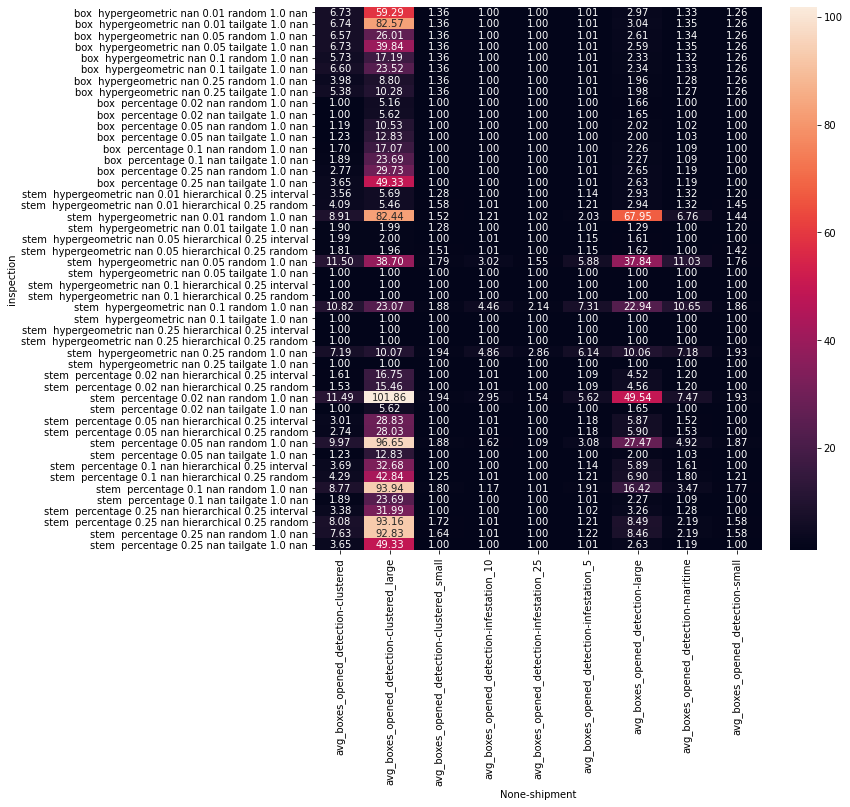

In [20]:
inspections_vs_shipments_boxes_opened_detection = df.pivot_table(index=["inspection"], columns=["shipment"], values=["avg_boxes_opened_detection"])

plt.figure(figsize=(10, 10))
sns.heatmap(data=inspections_vs_shipments_boxes_opened_detection, annot=True, fmt=".2f")


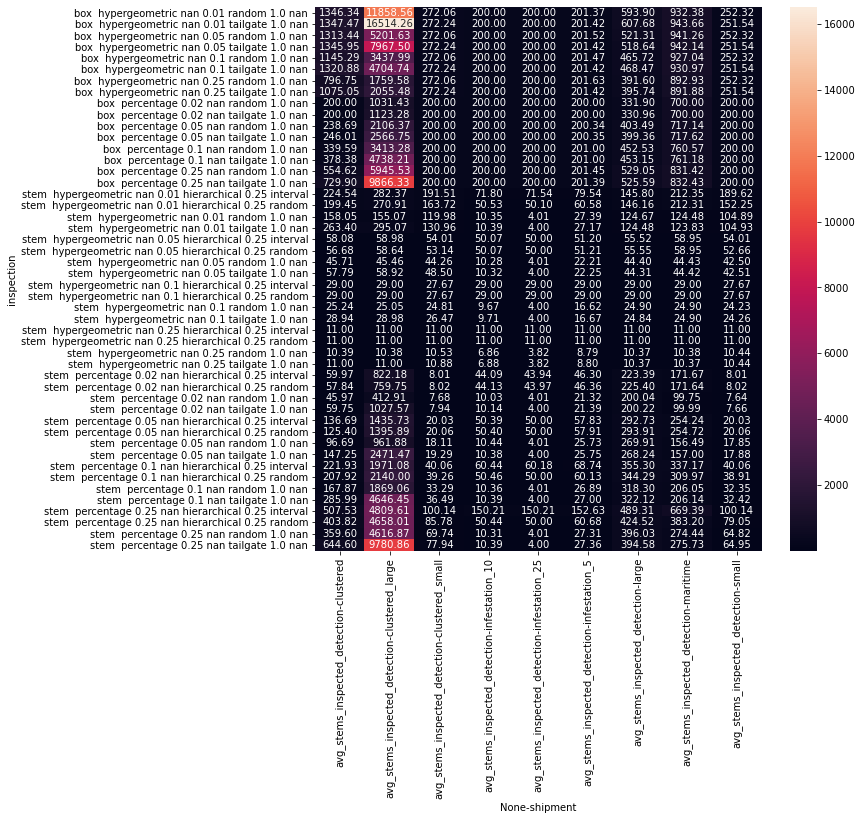

In [21]:
inspections_vs_shipments_stems_inspected_detection = df.pivot_table(index=["inspection"], columns=["shipment"], values=["avg_stems_inspected_detection"])

plt.figure(figsize=(10, 10))
sns.heatmap(data=inspections_vs_shipments_stems_inspected_detection, annot=True, fmt=".2f")

In [22]:
df_norm = df[["missing",
        "true_infestation_rate",
        "max_missed_infestation_rate",
        "avg_missed_infestation_rate",
        "max_intercepted_infestation_rate",
        "avg_intercepted_infestation_rate",
        "avg_boxes_opened_completion",
        "avg_boxes_opened_detection",
        "avg_stems_inspected_completion",
        "avg_stems_inspected_detection",
        "pct_sample_if_to_detection",
        "pct_pest_unreported_if_detection"]]
df_norm

missing  true_infestation_rate  max_missed_infestation_rate  \
0     8.657905               0.012361                     0.019246   
1     8.770793               0.012364                     0.018504   
2     4.023197               0.012361                     0.008996   
3     3.999237               0.012287                     0.008994   
4     2.055213               0.012361                     0.005024   
..         ...                    ...                          ...   
427  86.551468               0.010835                     0.088083   
428  96.153567               0.010835                     0.102083   
429  86.383880               0.010848                     0.097333   
430  92.324305               0.010857                     0.104750   
431  96.153567               0.010835                     0.102083   

     avg_missed_infestation_rate  max_intercepted_infestation_rate  \
0                       0.001631                          0.111800   
1                       0.001613                          0.115768   
2                       0.000854                          0.111800   
3                       0.000871                          0.108687   
4                       0.000524                          0.111800   
..                           ...                               ...   
427                     0.011556                          0.109250   
428                     0.013055                          0.106667   
429                     0.012278                          0.113167   
430                     0.012805                          0.115583   
431                     0.013055                          0.106667   

     avg_intercepted_infestation_rate  avg_boxes_opened_completion  \
0                            0.013412                      5.75076   
1                            0.013433                      5.74118   
2                            0.012876                     13.65769   
3                            0.012796                     13.60768   
4                            0.012642                     26.81868   
..                                ...                          ...   
427                          0.028042                      1.00000   
428                          0.031769                      1.00000   
429                          0.023135                      1.98736   
430                          0.025775                      1.00000   
431                          0.031769                      1.00000   

     avg_boxes_opened_detection  avg_stems_inspected_completion  \
0                       1.65478                      1150.15200   
1                       1.65948                      1148.23600   
2                       1.99680                      2731.53800   
3                       2.01743                      2721.53600   
4                       2.26577                      5363.73600   
..                          ...                             ...   
427                     1.00000                        27.66741   
428                     1.00000                        11.00000   
429                     1.93597                        11.00000   
430                     1.00000                        11.00000   
431                     1.00000                        11.00000   

     avg_stems_inspected_detection  pct_sample_if_to_detection  \
0                        330.95600                   28.776465   
1                        331.89600                   28.904883   
2                        399.36000                   14.621324   
3                        403.48600                   14.826323   
4                        453.15400                    8.449092   
..                             ...                         ...   
427                       27.66741                  100.000000   
428                       10.88054                   98.914000   
429                       10.52677                   95.697909   
430                

In [23]:
df_norm=(df_norm-df_norm.min())/(df_norm.max()-df_norm.min())
df_norm

missing  true_infestation_rate  max_missed_infestation_rate  \
0    0.086609               0.006354                     0.060590   
1    0.087738               0.006365                     0.058249   
2    0.040246               0.006354                     0.028247   
3    0.040006               0.006047                     0.028241   
4    0.020559               0.006354                     0.015712   
..        ...                    ...                          ...   
427  0.865810               0.000009                     0.277815   
428  0.961864               0.000009                     0.321993   
429  0.864133               0.000063                     0.307004   
430  0.923558               0.000100                     0.330408   
431  0.961864               0.000009                     0.321993   

     avg_missed_infestation_rate  max_intercepted_infestation_rate  \
0                       0.006548                          0.259991   
1                       0.006477                          0.272445   
2                       0.003376                          0.259991   
3                       0.003449                          0.250223   
4                       0.002029                          0.259991   
..                           ...                               ...   
427                     0.047075                          0.251989   
428                     0.053194                          0.243881   
429                     0.050023                          0.264281   
430                     0.052176                          0.271866   
431                     0.053194                          0.243881   

     avg_intercepted_infestation_rate  avg_boxes_opened_completion  \
0                            0.004626                     0.018150   
1                            0.004711                     0.018113   
2                            0.002384                     0.048358   
3                            0.002048                     0.048167   
4                            0.001404                     0.098639   
..                                ...                          ...   
427                          0.065774                     0.000000   
428                          0.081350                     0.000000   
429                          0.045264                     0.003772   
430                          0.056296                     0.000000   
431                          0.081350                     0.000000   

     avg_boxes_opened_detection  avg_stems_inspected_completion  \
0                      0.006492                        0.035269   
1                      0.006539                        0.035210   
2                      0.009883                        0.084101   
3                      0.010088                        0.083792   
4                      0.012550                        0.165381   
..                          ...                             ...   
427                    0.000000                        0.000607   
428                    0.000000                        0.000093   
429                    0.009280                        0.000093   
430                    0.000000                        0.000093   
431                    0.000000                        0.000093   

     avg_stems_inspected_detection  pct_sample_if_to_detection  \
0                         0.019814                    0.283955   
1                         0.019871                    0.285246   
2                         0.023957                    0.141646   
3                         0.024207                    0.143707   
4                         0.027215                    0.079594   
..                             ...                         ...   
427                       0.001444                    1.000000   
428                       0.000428                    0.989082   
429                       0.000406                    0.956749   
430                       0.00

In [28]:
df_norm["name"], df_norm["inspection_num"], df_norm["inspection"], df_norm["shipment"] = df["name"], df["inspection_num"], df["inspection"], df["shipment"]
df_norm

missing  true_infestation_rate  max_missed_infestation_rate  \
0    0.086609               0.006354                     0.060590   
1    0.087738               0.006365                     0.058249   
2    0.040246               0.006354                     0.028247   
3    0.040006               0.006047                     0.028241   
4    0.020559               0.006354                     0.015712   
..        ...                    ...                          ...   
427  0.865810               0.000009                     0.277815   
428  0.961864               0.000009                     0.321993   
429  0.864133               0.000063                     0.307004   
430  0.923558               0.000100                     0.330408   
431  0.961864               0.000009                     0.321993   

     avg_missed_infestation_rate  max_intercepted_infestation_rate  \
0                       0.006548                          0.259991   
1                       0.006477                          0.272445   
2                       0.003376                          0.259991   
3                       0.003449                          0.250223   
4                       0.002029                          0.259991   
..                           ...                               ...   
427                     0.047075                          0.251989   
428                     0.053194                          0.243881   
429                     0.050023                          0.264281   
430                     0.052176                          0.271866   
431                     0.053194                          0.243881   

     avg_intercepted_infestation_rate  avg_boxes_opened_completion  \
0                            0.004626                     0.018150   
1                            0.004711                     0.018113   
2                            0.002384                     0.048358   
3                            0.002048                     0.048167   
4                            0.001404                     0.098639   
..                                ...                          ...   
427                          0.065774                     0.000000   
428                          0.081350                     0.000000   
429                          0.045264                     0.003772   
430                          0.056296                     0.000000   
431                          0.081350                     0.000000   

     avg_boxes_opened_detection  avg_stems_inspected_completion  \
0                      0.006492                        0.035269   
1                      0.006539                        0.035210   
2                      0.009883                        0.084101   
3                      0.010088                        0.083792   
4                      0.012550                        0.165381   
..                          ...                             ...   
427                    0.000000                        0.000607   
428                    0.000000                        0.000093   
429                    0.009280                        0.000093   
430                    0.000000                        0.000093   
431                    0.000000                        0.000093   

     avg_stems_inspected_detection  pct_sample_if_to_detection  \
0                         0.019814                    0.283955   
1                         0.019871                    0.285246   
2                         0.023957                    0.141646   
3                         0.024207                    0.143707   
4                         0.027215                    0.079594   
..                             ...                         ...   
427                       0.001444                    1.000000   
428                       0.000428                    0.989082   
429                       0.000406                    0.956749   
430                       0.00

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]),
 <a list of 48 Text major ticklabel objects>)

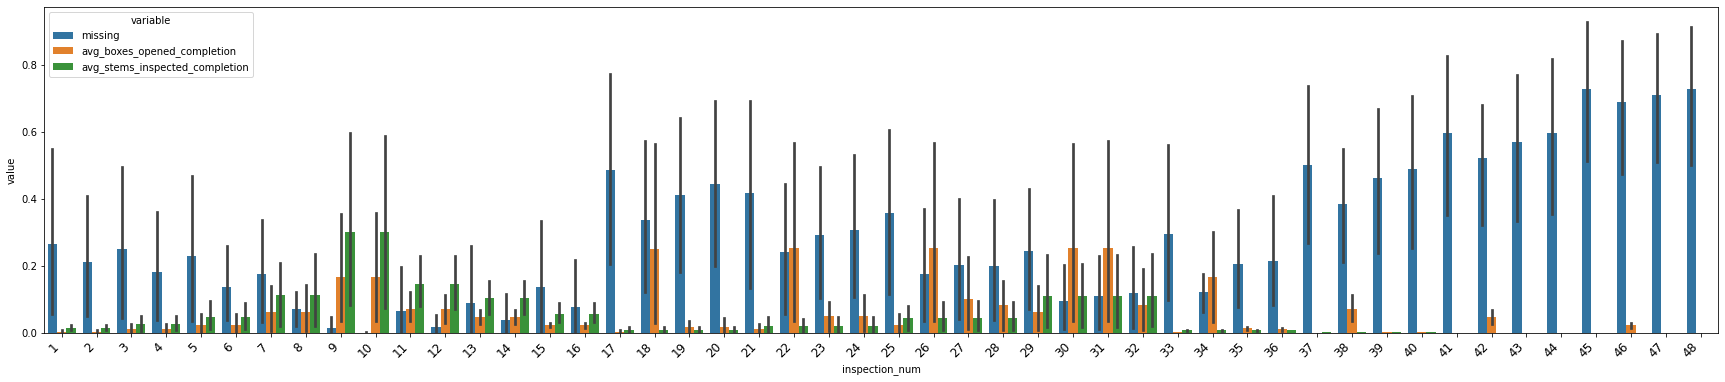

In [35]:
df_norm_melted = pd.melt(df_norm, id_vars=["inspection_num", "inspection", "shipment"], value_vars=["missing", "avg_boxes_opened_completion", "avg_stems_inspected_completion"])
fig, ax1 = plt.subplots(figsize=(30, 6))
chart = sns.barplot(x="inspection_num", y="value", hue="variable",\
                data=df_norm_melted, ax=ax1)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]),
 <a list of 48 Text major ticklabel objects>)

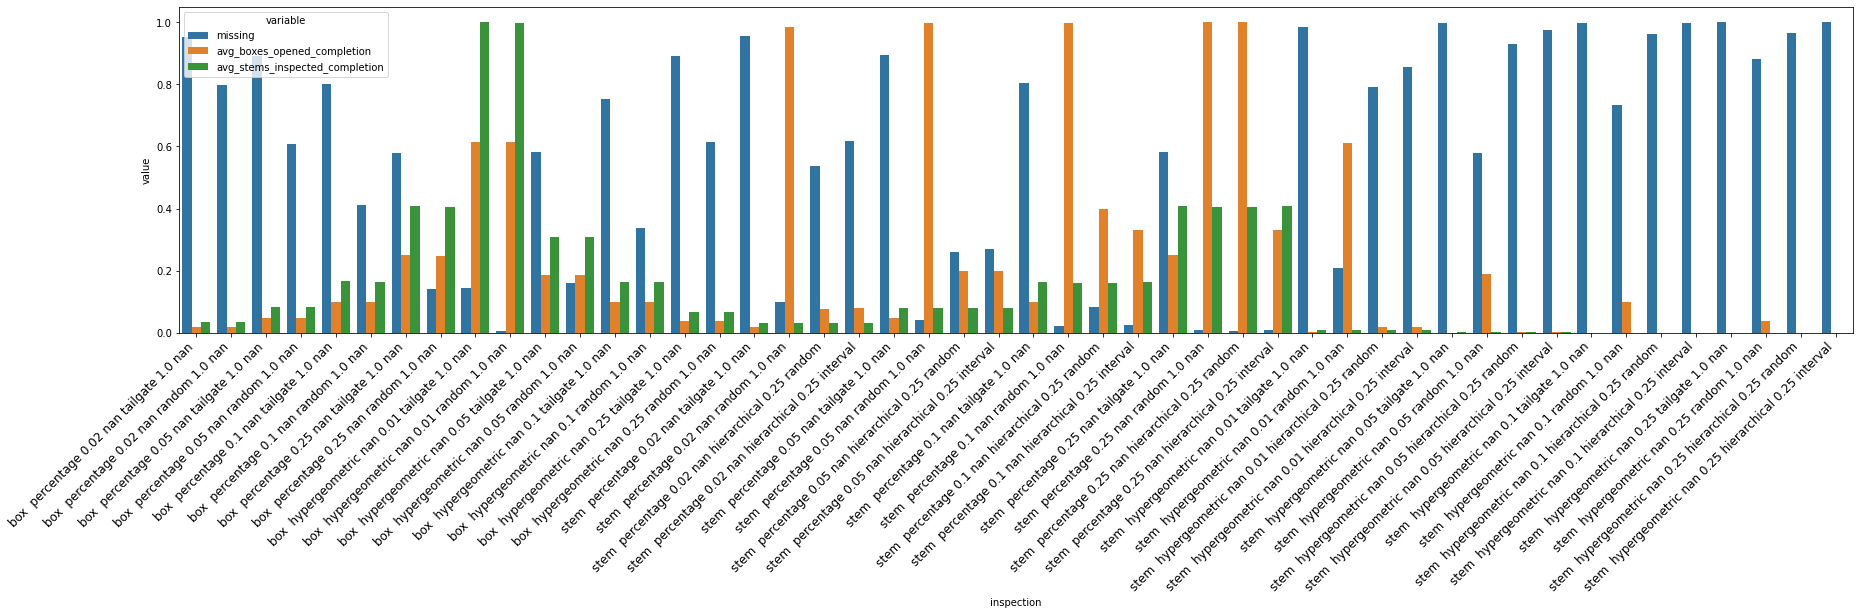

In [36]:
fig, ax1 = plt.subplots(figsize=(30, 6))
chart = sns.barplot(x="inspection", y="value", hue="variable",\
                data=df_norm_melted[df_norm_melted.shipment.eq("clustered_large")], ax=ax1)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)